<h1><ins>Individual Project Planning Stage (Jairoop Brar - Group 33)</ins></h1>

<h2>Introduction</h2>

Our group will be focusing on what type of players contribute the largest amount of data, and while more details about the question can be found under the **Questions** section, our analysis will primarily focus on the "players.csv" dataset, and as such, the following data description will work through and focus on just that dataset. Below I have uploaded and read the raw "player.csv" dataset using GitHub and have done some cleaning up (including the variable types and column names), followed by some preliminary summary statistics of the quantitative values. Below that, you can find my data description of the 'players.csv' dataset.

Additionally, here is my GitHub repository for this project, for you to view commits, changes, etc.:

https://github.com/jai-o1/individual-project

In [144]:
#importing libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [145]:
#reading the dataset from a github url
players_raw_data <- read_csv("https://raw.githubusercontent.com/jai-o1/individual-project/refs/heads/main/players.csv",
                            col_names = c('experience', 'subscribed', 'hashed_email', 'hours_played', 'name', 'gender', 'age'),
                            skip = 1,    #skip the old column names
                            show_col_types = FALSE)

#making sure each vector is the right type of variable (eg: experience should be a categorical factor)
players_data <- players_raw_data |>
                mutate(experience = as.factor(experience),
                        gender = as.factor(gender),
                        age = as.integer(age))

players_data

experience,subscribed,hashed_email,hours_played,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [146]:
#summarizing data to get summary statistics for quantitative variables (hours_played, and age)
players_summary <- players_data |>
                    summarize(max_hours_played = max(hours_played), min_hours_played = min(hours_played), mean_hours_played = mean(hours_played),
                              max_age = max(age, na.rm = TRUE), min_age = min(age, na.rm = TRUE), mean_age = mean(age, na.rm = TRUE))
players_summary

max_hours_played,min_hours_played,mean_hours_played,max_age,min_age,mean_age
<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
223.1,0,5.845918,58,9,21.13918


<h2>Data Description of 'players.cvs' Dataset</h2>

The players.csv dataset is a list of unique players who have played in a Minecraft server set up by a research group in Computer Science at UBC, and led by Frank Wood. This dataset includes information about each unique player, including their self-submitted personal information such as their experience level, name, gender and age, more logistical information such as their hashed email and whether they are subscribed to the game-related newsletter or not, and more gameplay-based information such as the number of hours they played. This dataset helps illustrate the types of players who have played on the server, and how much they have played.
- There are **196** Total Observations
- There are **7** Total Variables
- Below is a table including every variable name, data type, and explanation:

|Variable|Data Type|Explanation|
|--------|--------|--------|
|`experience`|factor (~~character~~)|The self-identified Minecraft skill/experience level of each player<br>(includes: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`|
|`subscribed`|logical|Whether each player is subscribed to the game-related newsletter or not<br>(`TRUE` if subscribed, `FALSE` if not)|
|`hashed_email`|character|64-digit hash which scrambles and encrypts each player's email<br>(this is done to hide player's real emails, with a unique string for each email)|
|`hours_played`|double|Total number of hours each player has played on the server|
|`name`|character|The submitted name of each player|
|`gender`|factor (~~character~~)|The self-identified gender of each player (includes: `Male`, `Female`,<br>`Non-binary`, `Two-Spirited`, `Agender`, `Other`, and `Prefer not to say`)|
|`age`|integer (~~double~~)|The submitted age of each player|

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Table 1**: Each variable from the 'players.csv' dataset, including their name, data type 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; (previous data types from raw file were strikethroughed in brackets if changed), 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; and an explanation.

- Below is a table including the summary statistics for the quantitative variables (hours_played and age) are as follows:

|Variable|Mean|Maximum|Minimum|
|--------|--------|--------|--------|
|`hours_played`|5.85|223.10|0.00|
|`age`|21.14|58|0|

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; **Table 2**: Summary statistics for each quantitative variable in the 'players.csv' dataset,
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; including the mean, maximum value, and minimum value.

Some issues that appear in the dataset are that the age variable has some 'NA' values, which we would have to work around. Additionally, although we can't see it in the dataset itself, some players could have lied about either their age, name, gender, or they could have given a fake email, which we cannot explicitly identify, but it should be considered for later data analysis. Additionally, for the amount of hours played, some players could have had the Minecraft server running in the background, or could be AFK doing something else as their number of hours accumulate, which also cannot be identified, but should be taken into consideration.

<h2>Questions</h2>

The broad question I will address is "**Question 2:** We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts." Based on this broad question, the specific question I created is:

Can a player's **experience level** predict the **total number of hours** they played on the Minecraft server, based on the Minecraft player research dataset?

The data will help address my question of interest, as `experience` will be used to denote the skill of a player, and will be the independent/explanatory variable. Meanwhile, from the data, `hours_played` will provide the amount of time or the total number of hours played on the server, therefore being the response variable. I plan to wrangle and group the `experience` variable based on its factors (Pro, Veteran, Amateur, Regular, and Beginner) and visualize the number of hours played by each player in each skill level on a box plot, therefore allowing me to compare averages such as mean, spread of data, and the 25th and 27th percentile.

<h2>Exploratory Data Analysis and Visualization</h2>

I have already previously loaded the dataset into R and did the minimum necessary wrangling to turn the data into a tidy format. Overall, the dataset was already tidy, where each column is a variable, each row is an observation, and each cell is a single value, so I did not have to tidy up the format of the data itself. However, the data types did need some cleaning up as previously stated in the **Data Description** section, where `experience` was originally a <ins>character</ins>, but I changed it into a <ins>factor</ins>, as there are 5 values and skill level should be categorical. `gender` was also originally a <ins>character</ins>, but I also changed it into a <ins>factor</ins>, as there are 7 distinct values and it should be categorical, considering there is an 'Other' option. Finally, `age` was originally a quantitative <ins>double</ins> value, however I changed it into an <ins>integer</ins> value, as age is only whole numbers in the dataset and does not contain any decimals as a <ins>double</ins> would.

Below you can find the clean and minimally wrangled dataset, which I assigned to the `players_data` variable, and that it can be loaded into R:

In [147]:
players_data

experience,subscribed,hashed_email,hours_played,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


<br>I have previously calculated the mean values for each quantiative variable in the players.csv dataset, but below is the code again for ONLY the **mean** of the two quantitative values (hours_played and age) in a table format:

In [148]:
#calculating mean of each quantitative variable
players_mean <- players_data |>
                    summarize(mean_hours_played = mean(hours_played), mean_age = mean(age, na.rm = TRUE))
players_mean

mean_hours_played,mean_age
<dbl>,<dbl>
5.845918,21.13918


<br>Below are a few exploratory visualizations of the data, I have included a description under each visualization:

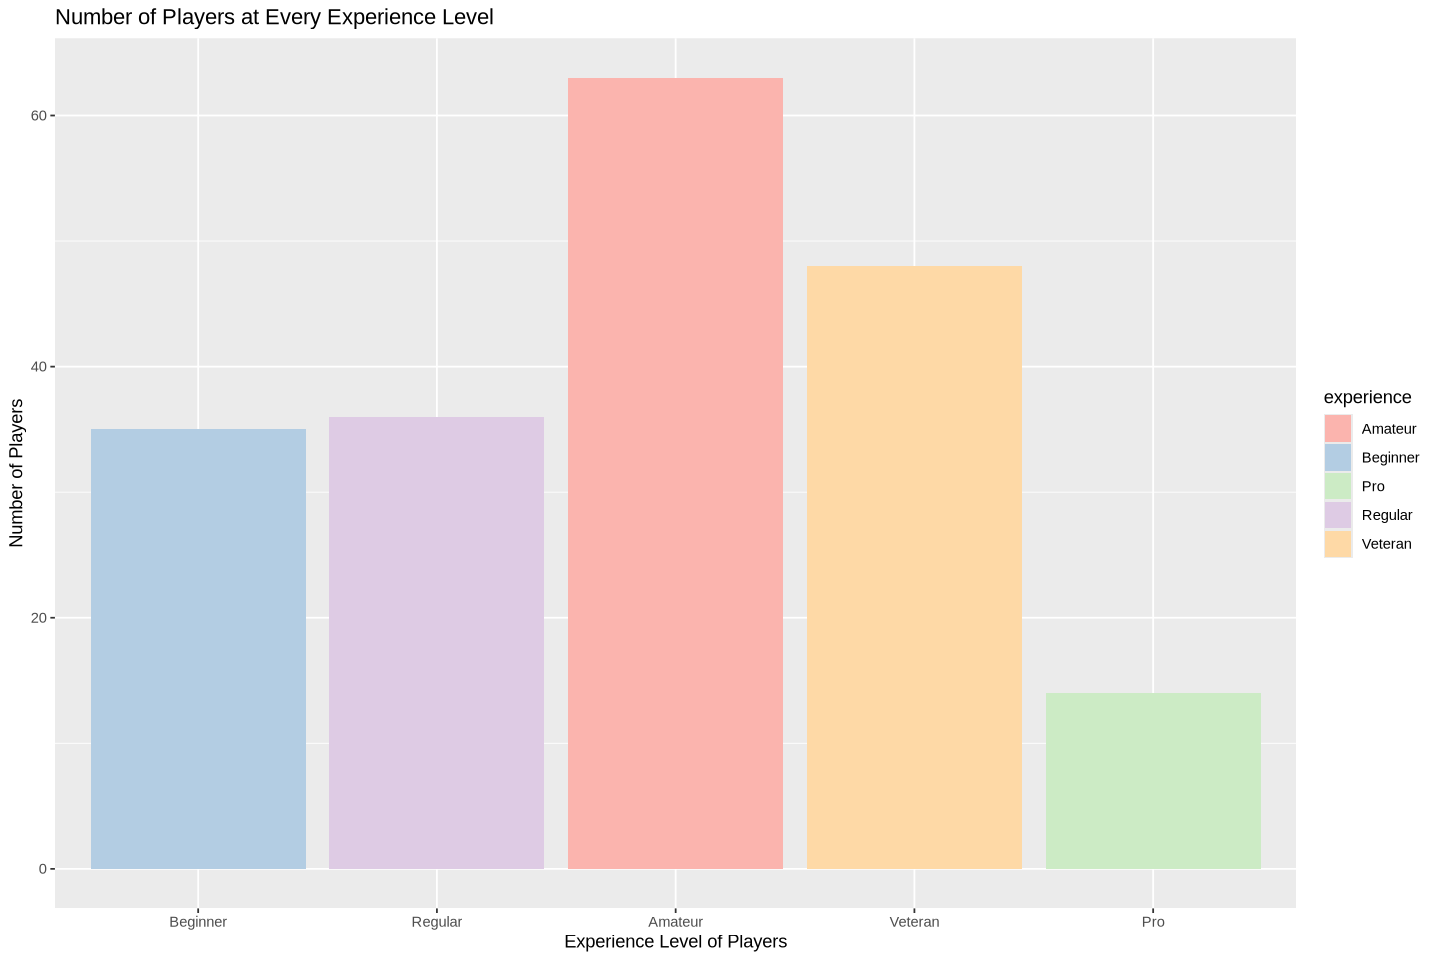

In [149]:
#this is for colours used in visualizations
library(RColorBrewer)

#visualizing number of players at each experience level
options(repr.plot.width = 12, repr.plot.height = 8) 
players_per_experience <- players_data|>
    group_by(experience) |>
    summarize(count = n()) |>
    ggplot(aes(x = factor(experience, levels = c('Beginner', 'Regular', 'Amateur', 'Veteran', 'Pro')), y = count, fill = experience)) + 
    geom_bar(stat = "identity") +
    labs(x = 'Experience Level of Players', y = 'Number of Players', title = 'Number of Players at Every Experience Level', fill = 'experience') + 
    scale_fill_brewer(palette = 'Pastel1')
players_per_experience

This bar graph helps visualize the number of players at every experience level, and from this we can see that the experience level with the most amount of players is 'Amateur', while 'Pro' is the experience level with the least amount of players. Additionally, there is a very similar amount of Beginners and Regulars, with a slightly larger amount of Veterans. From this, we can see that the majority of players fall around the amateur level, with more players being closer to a Regular or Beginner level compared to a Pro level.

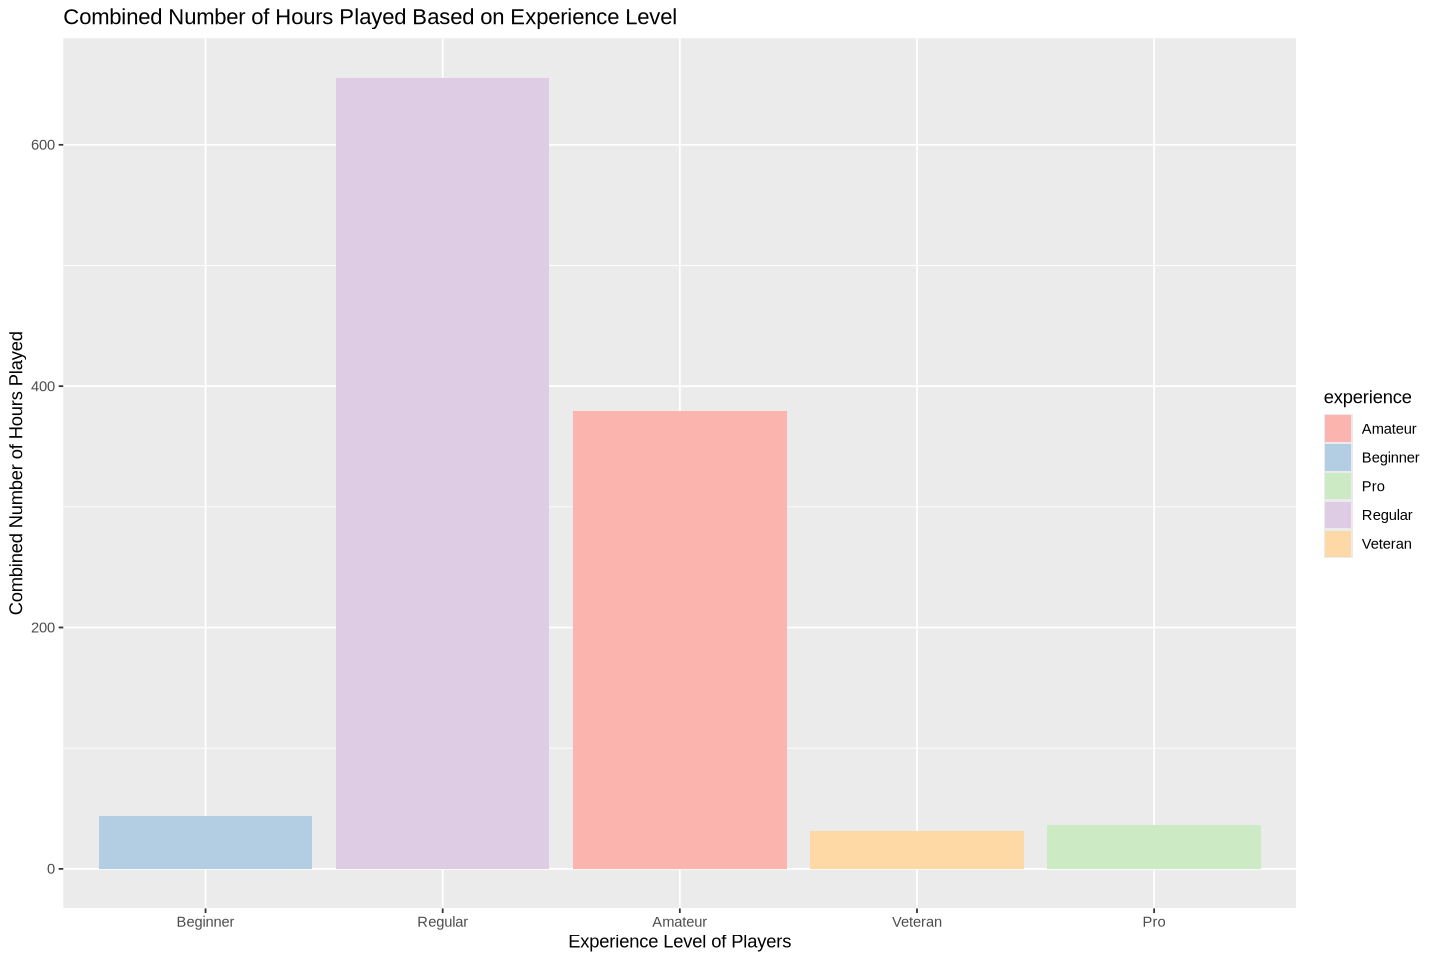

In [150]:
options(repr.plot.width = 12, repr.plot.height = 8) 
hours_per_experience <- players_data|>
    group_by(experience) |>
    summarize(sum = sum(hours_played)) |>
    ggplot(aes(x = factor(experience, levels = c('Beginner', 'Regular', 'Amateur', 'Veteran', 'Pro')), y = sum, fill = experience)) + 
    geom_bar(stat = "identity") +
    labs(x = 'Experience Level of Players', y = 'Combined Number of Hours Played', title = 'Combined Number of Hours Played Based on Experience Level', fill = 'experience') + 
    scale_fill_brewer(palette = 'Pastel1')
hours_per_experience

This bar graph helps visualize the combined total number of hours played by each player based on experience level. We can see here that the 'Regular' players contribute the highest number of playtime combined, while 'Veteran' players contribute the least. Amateur players also have the second largest amount of hours combined, however, it should be noted that this visualization does not account for the total number of players at every experience level. That being said, since Amateur has the largest number of players, it makes sense that it would also have a larger amount of combined hours played. The question I described earlier in the **Questions** section accounts for this, and will take the total number of players at every experience level into consideration before determining which type of player contributes the most amount of data through hours played.

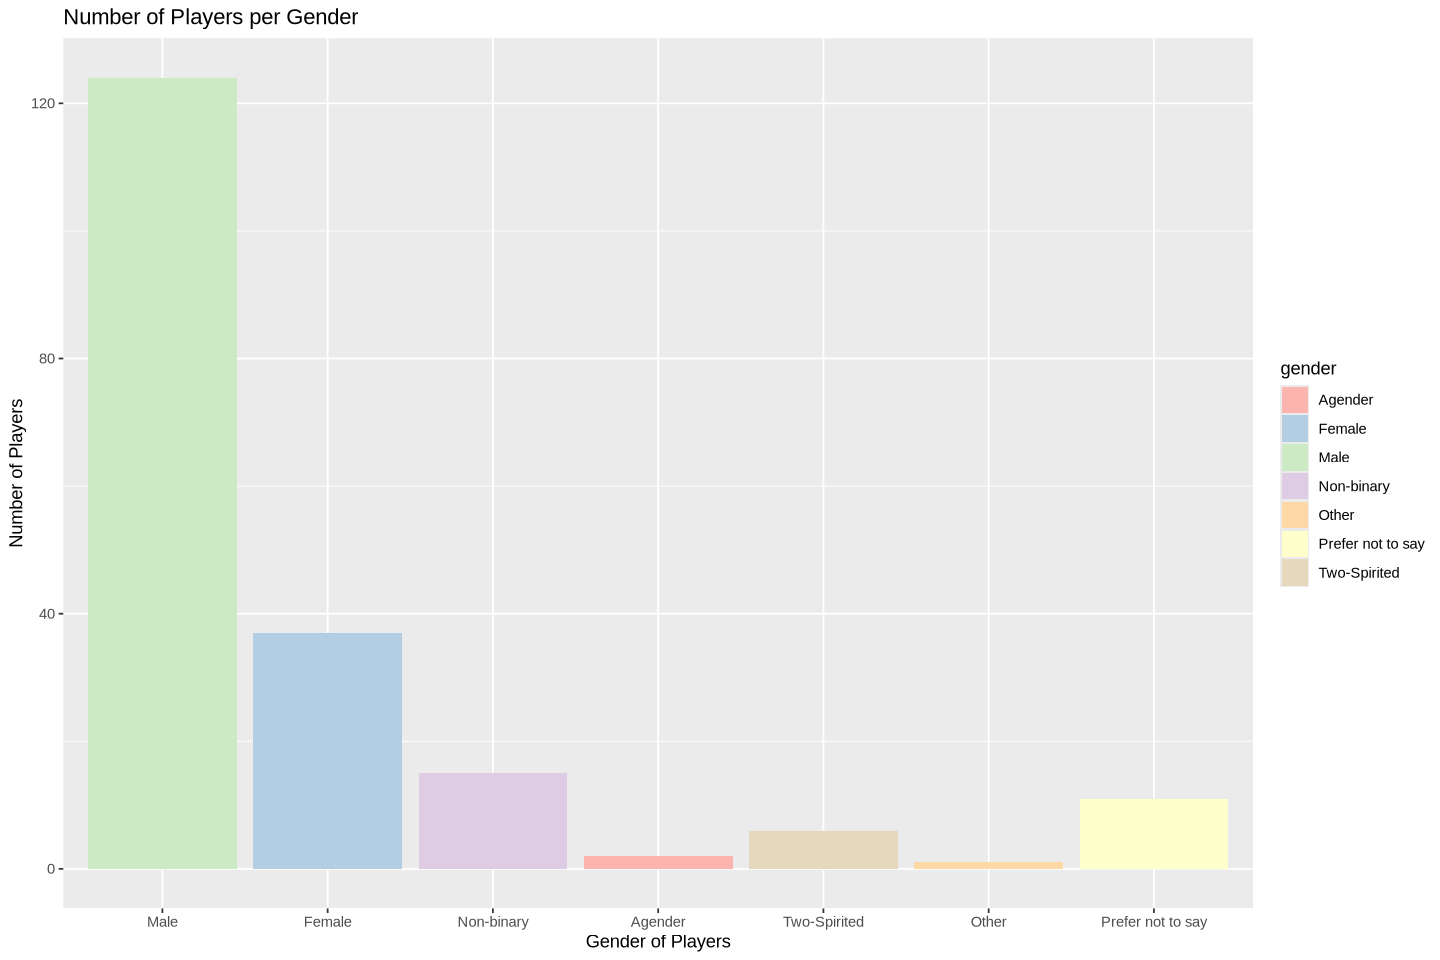

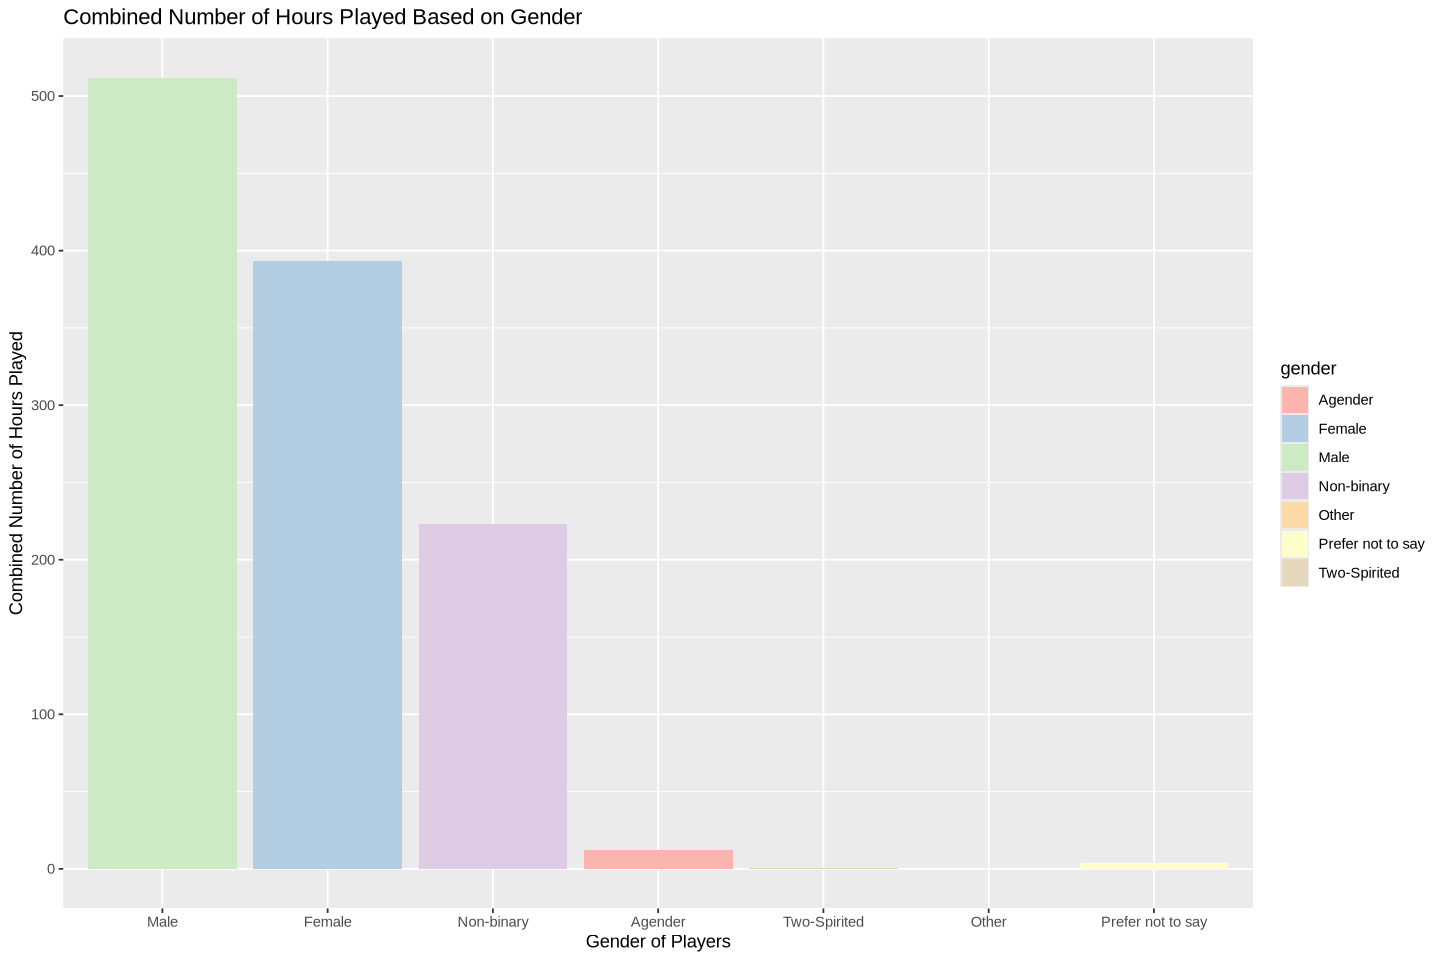

In [151]:
options(repr.plot.width = 12, repr.plot.height = 8) 
players_per_gender <- players_data |>
    group_by(gender) |>
    summarize(count = n()) |>
    ggplot(aes(x = factor(gender, levels = c('Male', 'Female', 'Non-binary', 'Agender', 'Two-Spirited', 'Other', 'Prefer not to say')), y = count, fill = gender)) + 
    geom_bar(stat = "identity") +
    labs(x = 'Gender of Players', y = 'Number of Players', title = 'Number of Players per Gender', fill = 'gender') + 
    scale_fill_brewer(palette = 'Pastel1')

hours_per_gender <- players_data|>
    group_by(gender) |>
    summarize(sum = sum(hours_played)) |>
    ggplot(aes(x = factor(gender, levels = c('Male', 'Female', 'Non-binary', 'Agender', 'Two-Spirited', 'Other', 'Prefer not to say')), y = sum, fill = gender)) + 
    geom_bar(stat = "identity") +
    labs(x = 'Gender of Players', y = 'Combined Number of Hours Played', title = 'Combined Number of Hours Played Based on Gender', fill = 'gender') + 
    scale_fill_brewer(palette = 'Pastel1')

players_per_gender
hours_per_gender

Above I have recreated the previous two bar graphs based on experience level, but now looking at gender instead. As we can see, there are a lot more 'Male' players than any other gender, followed by 'Female' and then 'Non-binary', although these two player counts are lot lower than that of the 'Male' player count, and also there are very few players of the other listed genders. However, when we look at the combined number of hours played based on gender, the 'Male' gender also has the most combined hours played, but 'Female' and 'Non-binary' have a lot more hours relative to their player count, and the combined hours played for 'Female' players is very close to the hours played by males. Once again, similar to my comments on the previous graph, the combined total hours played, once again does not account for this bias in magnitude of players when accounting for the total combined hours played, and it would be better to look at the mean hours played of each gender to see which gender contributes the most data.

Overall, this data has helped me better understand underlying biases I have to consider for my project, such as the difference in magnitudes of player counts at each experience level. I will have to take this into consideration when looking at which experience level contributes the most amount of data as I have previously stated. Additionally, these plots help me better understand the scale of the player count and number of hours played, which will be helpful when analysing the data after I wrangle it in the group portion of the project.

<h2>Methods and Plan</h2>

To predict the number of hours played based on experience levels of players I will use Linear Regression. I believe this is appropriate to model the relationship between `hours_played` and `experience`, as `experience` has more than one predictor, and `hours_played` is a continuous and quantitative 'dbl' value. As stated previously, I will focus on the two variables `hours_played` and `experience`. For this method to work, we have to assume that the relationship is linear, and that the data is tidy (each observation is for a single player), which it is. A few limitations of this method is that if the data is not linear, the model's predictions may be inaccurate and biased, and any outliers can also skew the model, which we will account for with scaling, which is mentioned later. To compare and select the model, we can use RMSE to evaluate the model performance based on each `experience` factor, and also apply a k-fold cross-validation to our training data, likely a 5-fold. For data processing, we will split the dataset into a training and testing set using 75% and 25% respectively, along the aforementioned RMSE and k-fold cross-validation to ensure the model works as intended. Additionally, as observed in the visualizations, scaling definitely has to be done to our data during processing to ensure there is no bias or skewing built in our model.

<h2>GitHub Repository</h2>

Here is my GitHub repository link for this project, for you to view commits, changes, etc.:

https://github.com/jai-o1/individual-project